In [ ]:
import pandas as pd
from nltk.tokenize import sent_tokenize,word_tokenize
import nltk
from nltk.corpus import stopwords


In [ ]:
#Loading the preprocessed Corpus
corpus = pd.read_csv('corpus.csv')

In [ ]:
#Creating a list of list with words to create word2vec model
tex = []
for i,j in corpus['text'].iteritems():
  if type(j)==str:
    sent = sent_tokenize(j)
    for k in sent:
      words = word_tokenize(k)
      words = [w for w in words if w!='.']
      if len(words)!=0:
        tex.append(words)




In [ ]:
def compute_word_vectors(): 
    logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
    model = Word2Vec(tex, size=128, window=5, min_count=50, workers=10, iter=5)
    #Saving the word2vec model
    model.save('text9.model.bin')
    return model

In [ ]:
def compute_similar_words(model,source_word, topn=5):
    print('\r Computing similar words for the source word - {0}'.format(source_word),end='')
    similar_words = [source_word]
    try:
        top_words = model.wv.most_similar(source_word,topn=topn)
        similar_words.extend([val[0] for val in top_words])
    except KeyError as err:
        print(err.args)
    return similar_words  

In [ ]:
def compute_similar_words_for_assignment3(model):  
    columns = ['word'+str(i-1) for i in range(1,7)]
    df = pd.DataFrame(data=None,columns=columns)
 
    #Keywords to find similar words and create the knowledge graph 
    keywords=['environment','surgery','research','university','patients','infected','hospital','asymptomatic','respiratory','pathogens']

    # 3 levels deep similar words 
    for source_word in keywords:                                                     
        similar_words = compute_similar_words(model,source_word)
        df.loc[len(df)] = similar_words
        
        for i in range(1,len(similar_words)):
            similar_words2 = compute_similar_words(model,similar_words[i])
            df.loc[len(df)] = similar_words2
            
            for i in range(1,len(similar_words2)):
              similar_words3 = compute_similar_words(model,similar_words2[i])
              df.loc[len(df)] = similar_words3
               

    #Storing similar words in a csv file
    df.to_csv('similar_words_assignment3.csv')

Keywords I have used to create the Knowledge Graph:
environment
surgery
research
university
patients
infected
hospital
asymptomatic
respiratory
pathogens

In [ ]:
import logging
from gensim.models import Word2Vec

model = compute_word_vectors()
compute_similar_words_for_assignment3(model)

2021-04-21 12:50:15,174 : INFO : collecting all words and their counts
2021-04-21 12:50:15,178 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-04-21 12:50:15,224 : INFO : PROGRESS: at sentence #10000, processed 152494 words, keeping 21216 word types
2021-04-21 12:50:15,268 : INFO : PROGRESS: at sentence #20000, processed 306286 words, keeping 33604 word types
2021-04-21 12:50:15,314 : INFO : PROGRESS: at sentence #30000, processed 456528 words, keeping 43680 word types
2021-04-21 12:50:15,367 : INFO : PROGRESS: at sentence #40000, processed 605938 words, keeping 52244 word types
2021-04-21 12:50:15,415 : INFO : PROGRESS: at sentence #50000, processed 758743 words, keeping 59661 word types
2021-04-21 12:50:15,460 : INFO : PROGRESS: at sentence #60000, processed 911065 words, keeping 67109 word types
2021-04-21 12:50:15,511 : INFO : PROGRESS: at sentence #70000, processed 1070253 words, keeping 75940 word types
2021-04-21 12:50:15,561 : INFO : PROGRESS: at

 Computing similar words for the source word - pathogens

**Knowledge Graph of some Keywords:**

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

words = pd.read_csv('similar_words_assignment3.csv')

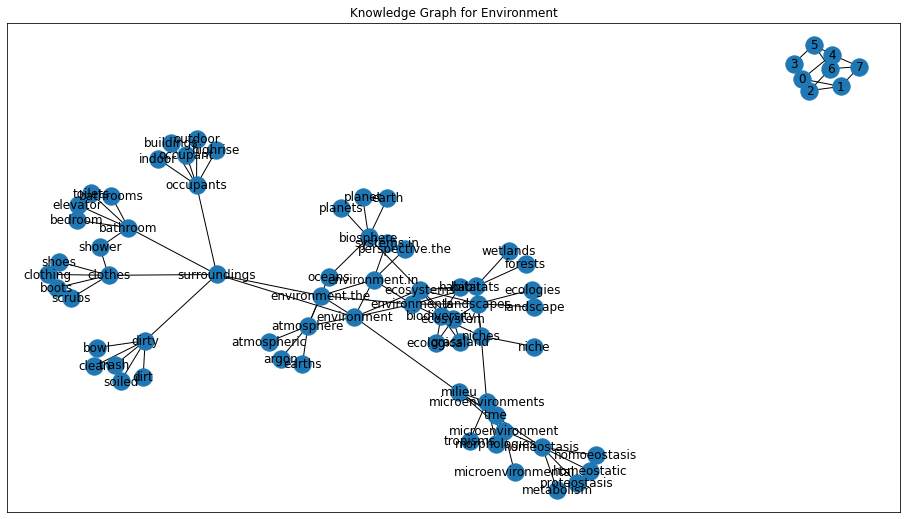

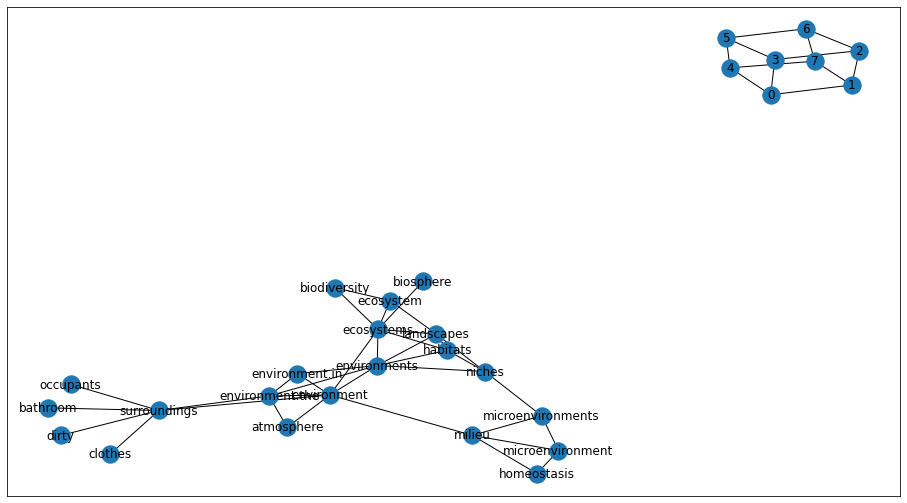

In [ ]:
# 3 levels deep knowledge graph with degree greater than 2 for the keyword "Environment"

g = nx.cubical_graph()

Environment = words[0:30]

#Construct the graph
for i, row in Environment.iterrows():
   
    for j in range(1,len(row)):
        g.add_node(row[j])
    for j in range(1,len(row)):
        g.add_edge(row[1], row[j])    
    
nx.draw_networkx(g)
plt.title('Knowledge Graph for Environment')
plt.show()       
      
G = nx.petersen_graph()
options = {
    'node_color': 'blue',
    'node_size': 8,
    'line_color': 'blue',
    'linewidths': 0.3,
    'width': 0.5,
    'font_size':6,
}


fedges = filter(lambda x: g.degree()[x[0]] > 2 and g.degree()[x[1]] > 2, g.edges())
f = nx.Graph()                                                                                                                                     
f.add_edges_from(fedges)

plt.rcParams['figure.figsize'] = [16, 9]

nx.draw_networkx(f)
plt.show()


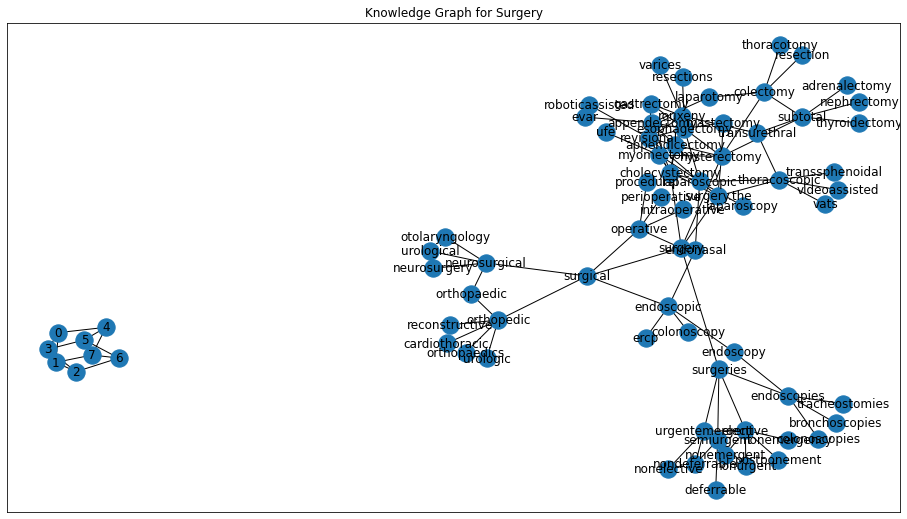

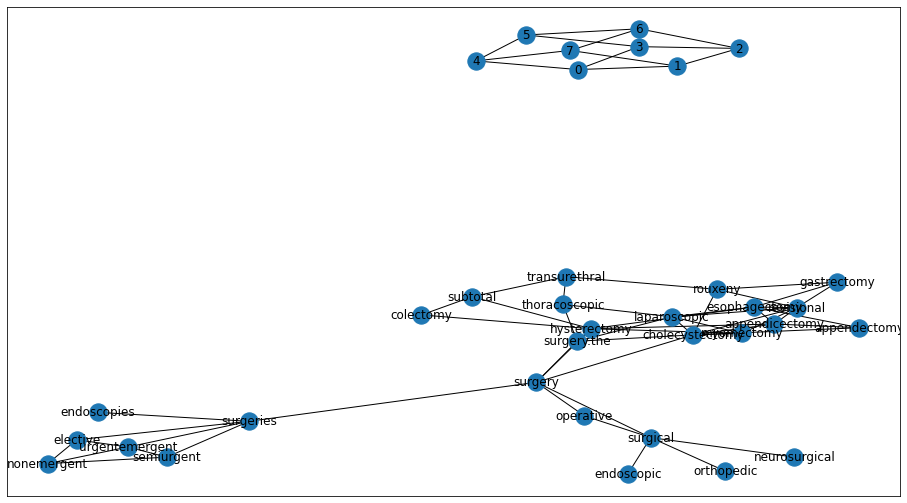

In [ ]:
# 3 levels deep knowledge graph with degree greater than 2 for the keyword "Surgery"

g = nx.cubical_graph()

surgery = words[31:61]


for i, row in surgery.iterrows():
   
    for j in range(1,len(row)):
        g.add_node(row[j])
    for j in range(1,len(row)):
        g.add_edge(row[1], row[j])    
    
nx.draw_networkx(g)
plt.title('Knowledge Graph for Surgery')
plt.show()       
      
G = nx.petersen_graph()
options = {
    'node_color': 'blue',
    'node_size': 8,
    'line_color': 'blue',
    'linewidths': 0.3,
    'width': 0.5,
    'font_size':6,
}



fedges = filter(lambda x: g.degree()[x[0]] > 2 and g.degree()[x[1]] > 2, g.edges())
f = nx.Graph()                                                                                                                                     
f.add_edges_from(fedges)

plt.rcParams['figure.figsize'] = [16, 9]

nx.draw_networkx(f)
plt.show()

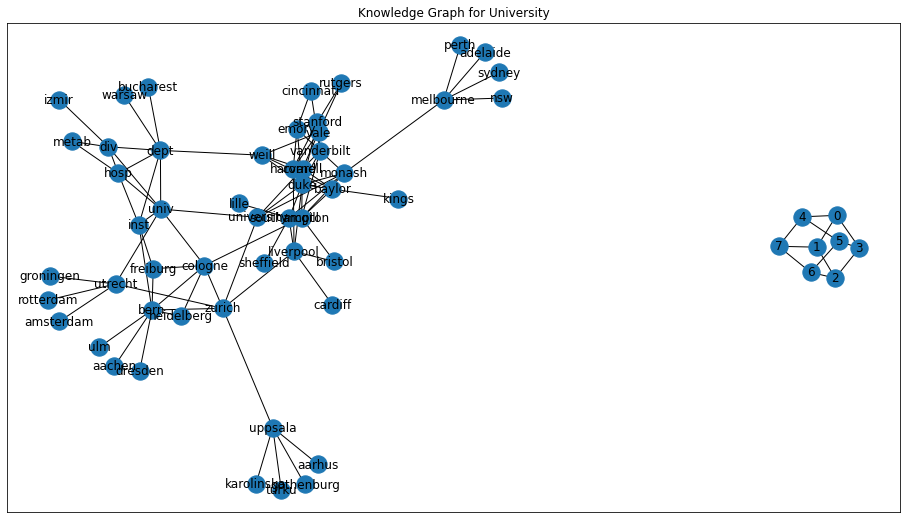

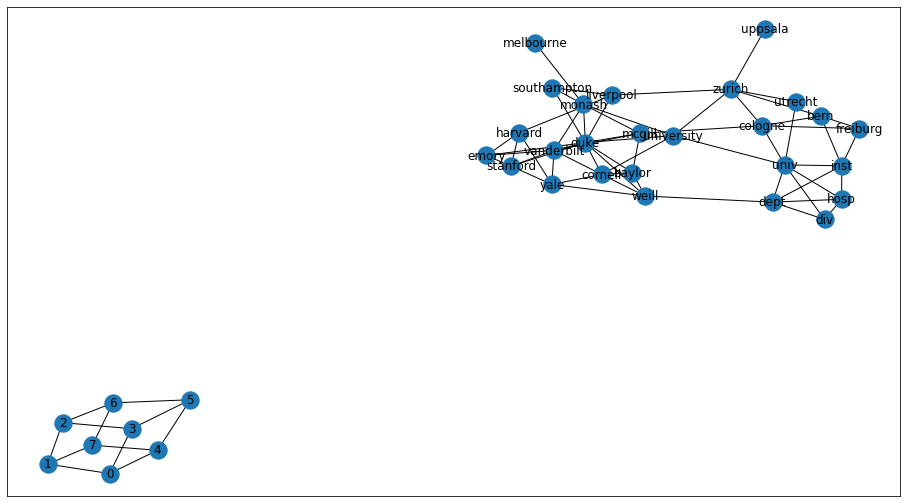

In [ ]:
# 3 levels deep knowledge graph with degree greater than 2 for the keyword "University"

g = nx.cubical_graph()

university = words[93:124]

#Construct the graph
for i, row in university.iterrows():
   
    for j in range(1,len(row)):
        g.add_node(row[j])
    for j in range(1,len(row)):
        g.add_edge(row[1], row[j])    
    
nx.draw_networkx(g)
plt.title('Knowledge Graph for University')
plt.show()       
      
G = nx.petersen_graph()
options = {
    'node_color': 'blue',
    'node_size': 8,
    'line_color': 'blue',
    'linewidths': 0.3,
    'width': 0.5,
    'font_size':6,
}

fedges = filter(lambda x: g.degree()[x[0]] > 2 and g.degree()[x[1]] > 2, g.edges())
f = nx.Graph()                                                                                                                                     
f.add_edges_from(fedges)

plt.rcParams['figure.figsize'] = [16, 9]

nx.draw_networkx(f)
plt.show()



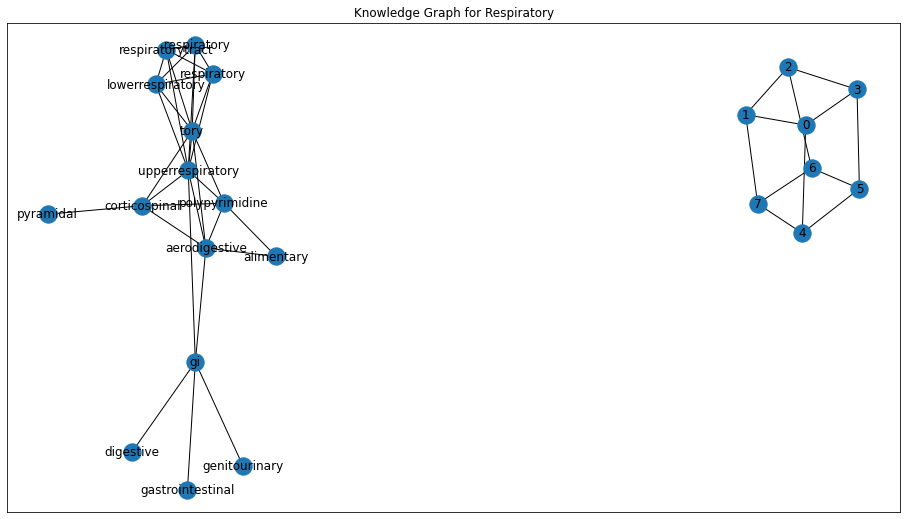

In [ ]:
# 3 levels deep knowledge graph for the keyword "Respiratory"

g = nx.cubical_graph()

respiratory = words[248:278]

#Construct the graph
for i, row in respiratory.iterrows():
   
    for j in range(1,len(row)):
        g.add_node(row[j])
    for j in range(1,len(row)):
        g.add_edge(row[1], row[j])    
    
nx.draw_networkx(g)
plt.title('Knowledge Graph for Respiratory')
plt.show()       
      
G = nx.petersen_graph()
options = {
    'node_color': 'blue',
    'node_size': 8,
    'line_color': 'blue',
    'linewidths': 0.3,
    'width': 0.5,
    'font_size':6,
}


